# 소개 (Introduction)

**미국 청소년 종단 연구 (National Longitudinal Survey of Youth) 1997-2011 데이터셋**은 미국 데이터를 다루는 사회 과학자들에게 가장 중요한 데이터베이스 중 하나입니다.

이 데이터셋을 통해 과학자들은 **소득의 결정 요인**뿐만 아니라 **교육적 성취**에 대해서도 연구할 수 있으며, 이는 **정부 정책**과 밀접한 관련이 있습니다. 또한, **다양한 인종, 성별 및 기타 요인에 따른 교육적 성취와 급여 수준의 차이**와 같은 **정치적으로 민감한 이슈**를 조명할 수도 있습니다.

이 변수들이 **교육과 소득에 미치는 영향을 더 잘 이해하게 되면**, 보다 적절한 **정부 정책**을 수립할 수도 있을 것입니다.

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


# Plotly 업그레이드

In [31]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


###  라이브러리 불러오기 (Import Statements)



In [59]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 노트북 출력 설정 (Notebook Presentation)

In [33]:
pd.options.display.float_format = '{:,.2f}'.format

# 데이터 불러오기 (Load the Data)



In [34]:
df_data = pd.read_csv('NLSY97_subset.csv')

### 데이터 이해하기 (Understand the Dataset)

다음 파일을 확인하세요: **NLSY97_Variable_Names_and_Descriptions.csv**

---------------------------

    :주요 변수(Key Variables):
      1. S           - 학력연수 (Years of schooling (highest grade completed as of 2011))
      2. EXP         - 총 근무연수 (Total out-of-school work experience (years) as of the 2011 interview.)
      3. EARNINGS    - 시간당 소득 (Current hourly earnings in $ reported at the 2011 interview)

# 기초 데이터 탐색 🔍 (Preliminary Data Exploration)

**문제 확인 (Challenge)**

* df_data의 형태는 어떻게 되는가?(What is the shape of `df_data`? )
* 몇 개의 행과 열이 있는가? (How many rows and columns does it have?)
* 컬럼(변수) 이름은 무엇인가? (What are the column names?)
* NaN 값 또는 중복 데이터가 있는가? (Are there any NaN values or duplicates?)

In [35]:
df_data.shape

(2000, 96)

In [36]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [37]:
df_data.isnull().sum()

ID          0
EARNINGS    0
S           0
EXP         0
FEMALE      0
           ..
MSA11NO     0
MSA11NCC    0
MSA11CC     0
MSA11NK     0
MSA11NIC    0
Length: 96, dtype: int64

In [38]:
df_data.duplicated(subset=['ID']).sum()
print(df_data.duplicated(subset=['ID']).sum())  # ID 기준 중복 확인

513


## 데이터 정리 - 결측값 및 중복 데이터 확인 (Data Cleaning - Check for Missing Values and Duplicates)

중복된 행을 찾아 제거하세요. (Find and remove any duplicate rows.)

In [39]:
df_data = df_data.drop_duplicates()
# ID 기준으로 중복된 행 제거 (첫 번째 값만 유지)
df_data = df_data.drop_duplicates(subset=['ID'], keep='first')
print(df_data.duplicated(subset=['ID']).sum())

0


In [40]:
# HHINC97 (1997년 가구 소득) - 중앙값 대체
df_data['HHINC97'] = df_data['HHINC97'].fillna(df_data['HHINC97'].median())
df_data.isnull().sum()

ID          0
EARNINGS    0
S           0
EXP         0
FEMALE      0
           ..
MSA11NO     0
MSA11NCC    0
MSA11CC     0
MSA11NK     0
MSA11NIC    0
Length: 96, dtype: int64

In [41]:
df_data['AGEMBTH'] = df_data['AGEMBTH'].fillna(df_data['AGEMBTH'].median())
print(df_data[['HHINC97', 'AGEMBTH']].isnull().sum())

HHINC97    0
AGEMBTH    0
dtype: int64


## 기술 통계 (Descriptive Statistics)

In [42]:
# 데이터 요약 통계 확인
print(df_data.describe())

            ID  EARNINGS        S      EXP   FEMALE     MALE    BYEAR  \
count 1,487.00  1,487.00 1,487.00 1,487.00 1,487.00 1,487.00 1,487.00   
mean  3,547.13     18.81    14.56     6.70     0.49     0.51 1,982.07   
std   2,009.84     12.00     2.77     2.86     0.50     0.50     1.38   
min       1.00      2.00     6.00     0.00     0.00     0.00 1,980.00   
25%   1,888.00     11.41    12.00     4.65     0.00     0.00 1,981.00   
50%   3,474.00     15.75    15.00     6.63     0.00     1.00 1,982.00   
75%   5,160.50     22.60    16.00     8.71     1.00     1.00 1,983.00   
max   8,980.00    132.89    20.00    14.73     1.00     1.00 1,984.00   

           AGE  AGEMBTH    HHINC97  ...    URBAN    REGNE    REGNC     REGW  \
count 1,487.00 1,487.00   1,487.00  ... 1,487.00 1,487.00 1,487.00 1,487.00   
mean     28.93    26.32  56,829.43  ...     0.78     0.16     0.27     0.34   
std       1.38     5.02  39,605.44  ...     0.43     0.36     0.44     0.47   
min      27.00    12.00   

In [43]:
# 데이터 타입 및 결측치 확인
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 0 to 1995
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   AGEMBTH   1487 non-null   float64
 9   HHINC97   1487 non-null   float64
 10  POVRAT97  1203 non-null   float64
 11  HHBMBF    1487 non-null   int64  
 12  HHBMOF    1487 non-null   int64  
 13  HHOMBF    1487 non-null   int64  
 14  HHBMONLY  1487 non-null   int64  
 15  HHBFONLY  1487 non-null   int64  
 16  HHOTHER   1487 non-null   int64  
 17  MSA97NO   1487 non-null   int64  
 18  MSA97NCC  1487 non-null   int64  
 19  MSA97CC   1487 non-null   int64  
 20  MSA97NK   1487 non-null   int64  
 

## 특징 시각화 (Visualise the Features)

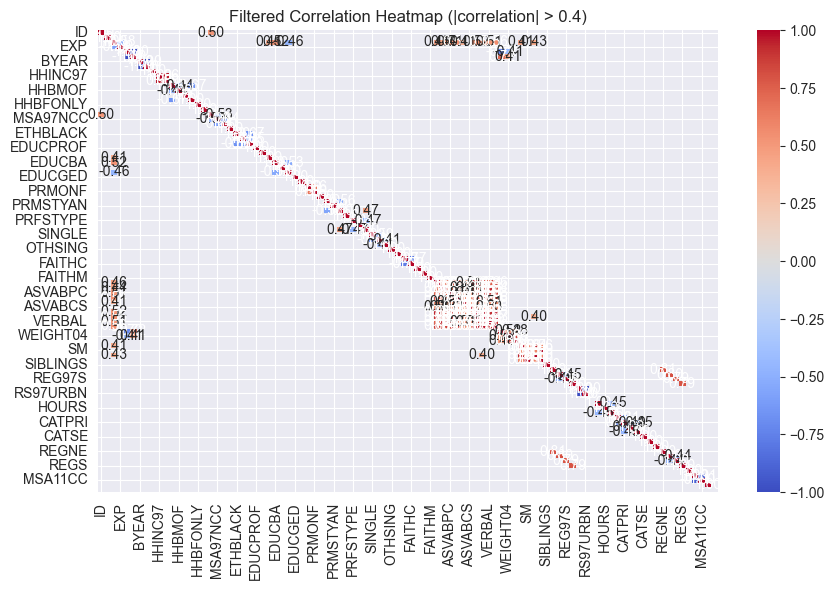

In [48]:
# 변수간 상관관계
# 상관행렬 계산
corr_matrix = df_data.corr()

# 특정 임계값 이상의 변수만 선택 (예: |상관계수| > 0.4)
threshold = 0.4
filtered_corr = corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)]

# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", mask=filtered_corr.isnull())
plt.title("Filtered Correlation Heatmap (|correlation| > 0.4)")
plt.show()

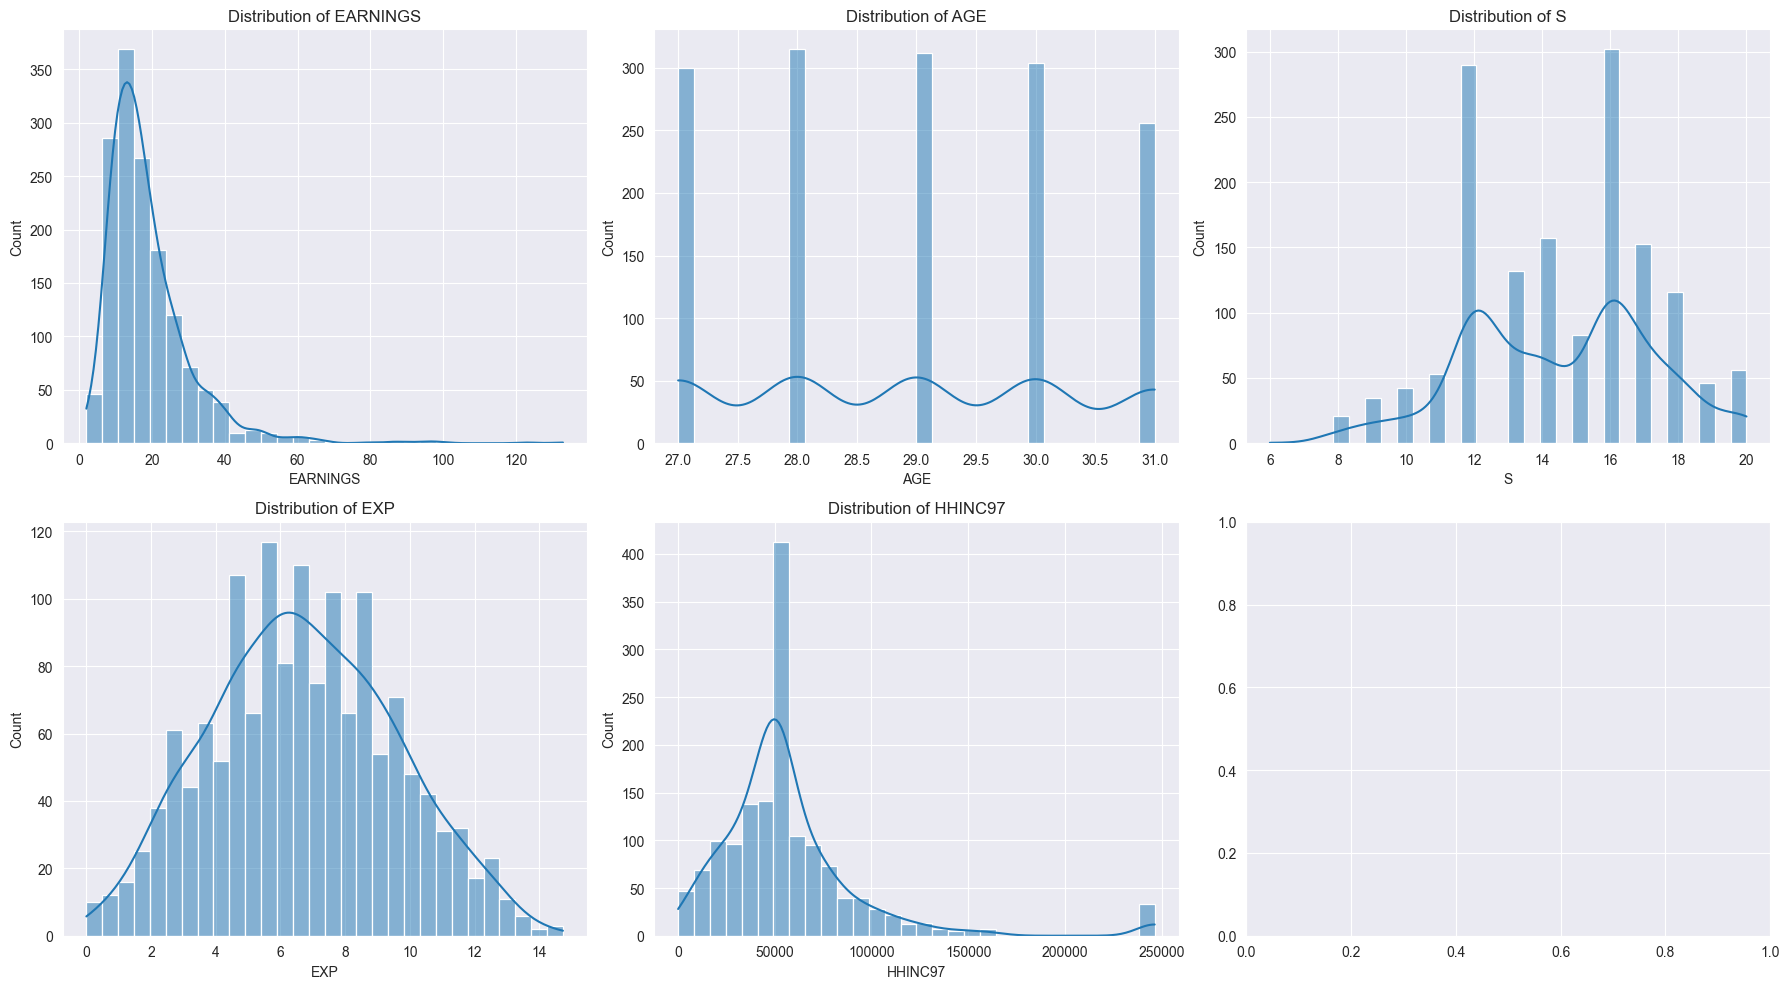

In [52]:
# 🔹 분포를 확인할 연속형 변수 목록
num_features = ['EARNINGS', 'AGE', 'S', 'EXP', 'HHINC97']

# 🔹 2행 3열의 서브플롯 생성 (각 변수별 히스토그램을 그리기 위한 준비)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2행 3열 그리드 생성
axes = axes.flatten()  # 2D 배열을 1D 리스트로 변환하여 루프에서 활용

# 🔹 각 변수별로 히스토그램 + KDE 커브 시각화
for i, feature in enumerate(num_features):
    sns.histplot(df_data[feature], kde=True, bins=30, ax=axes[i])
    # - `histplot()`: 히스토그램을 생성하는 Seaborn 함수
    # - `kde=True`: 커널 밀도 추정(KDE, Kernel Density Estimation) 곡선 추가
    # - `bins=30`: 히스토그램의 막대 개수를 30개로 설정 (값을 조절하면 더 세밀한 분석 가능)
    # - `ax=axes[i]`: 해당 subplot(축)에 그래프를 그림

    axes[i].set_title(f"Distribution of {feature}")  # 각 그래프의 제목 설정


# 🔹 레이아웃 조정 (그래프 간격 자동 조정)
plt.tight_layout()

# 🔹 그래프 출력
plt.show()


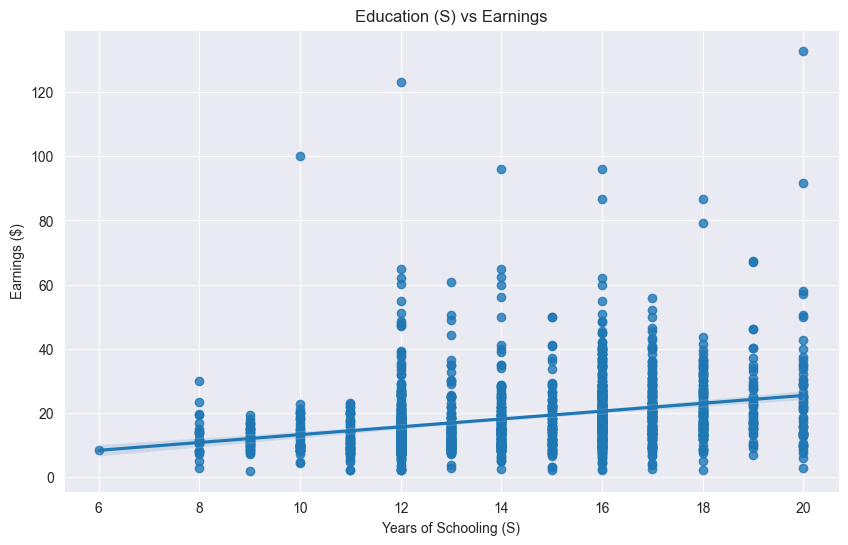

In [53]:
# 교육(S)과 소득(EARNINGS)의 관계 시각화
# 🔹 그래프 크기 설정
plt.figure(figsize=(10,6))

# 🔹 교육 연수(S)와 소득(EARNINGS) 간의 관계를 회귀선과 함께 시각화
sns.regplot(x=df_data['S'], y=df_data['EARNINGS'])

# 🔹 그래프 제목 및 축 레이블 설정
plt.title("Education (S) vs Earnings")  # 그래프 제목
plt.xlabel("Years of Schooling (S)")  # X축: 교육 연수(최종 학력)
plt.ylabel("Earnings ($)")  # Y축: 소득 (달러 기준)

# 🔹 그래프 출력
plt.show()

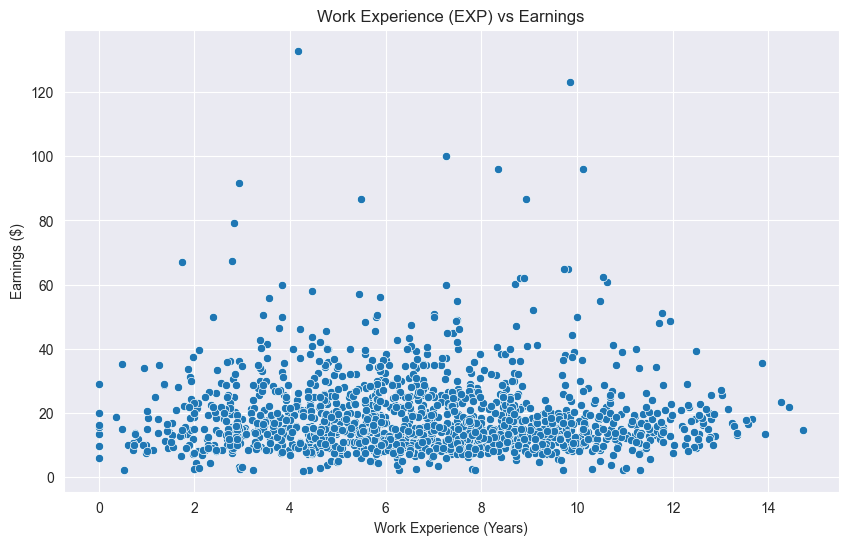

In [54]:
# 경험(EXP)과 소득(EARNINGS)의 관계 시각화

# 🔹 그래프 크기 설정
plt.figure(figsize=(10,6))

# 🔹 경험(EXP)과 소득(EARNINGS) 간의 관계를 산점도로 표현
sns.scatterplot(x=df_data['EXP'], y=df_data['EARNINGS'])

# 🔹 그래프 제목 및 축 레이블 설정
plt.title("Work Experience (EXP) vs Earnings")  # 그래프 제목
plt.xlabel("Work Experience (Years)")  # X축: 업무 경험(경력) 연수
plt.ylabel("Earnings ($)")  # Y축: 소득 (달러 기준)

# 🔹 그래프 출력
plt.show()

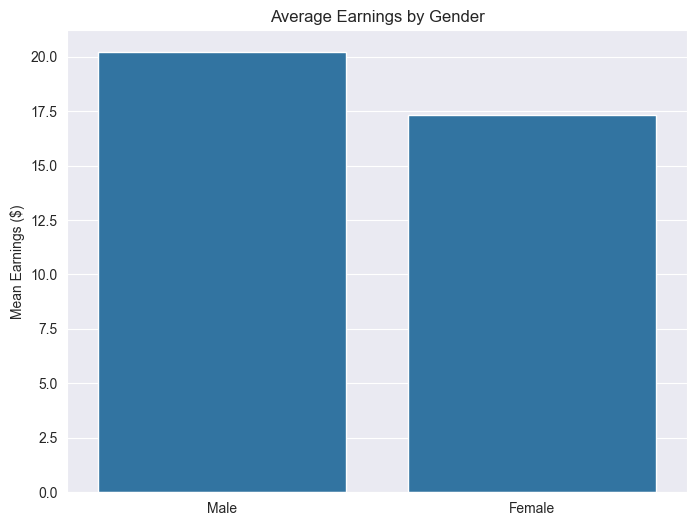

In [56]:
# 성별에 따른 평균 소득 비교
# 🔹 그래프 크기 설정
plt.figure(figsize=(8,6))

# 🔹 성별에 따른 평균 소득을 바(bar) 차트로 표현
sns.barplot(x=['Male', 'Female'],
            y=[df_data[df_data['MALE']==1]['EARNINGS'].mean(),  # 남성 평균 소득
               df_data[df_data['FEMALE']==1]['EARNINGS'].mean()])  # 여성 평균 소득

# 🔹 그래프 제목 및 축 레이블 설정
plt.title("Average Earnings by Gender")  # 그래프 제목
plt.ylabel("Mean Earnings ($)")  # Y축: 평균 소득

# 🔹 그래프 출력
plt.show()

Regression Coefficients: {'S': np.float64(1.8960459112558878), 'EXP': np.float64(1.0676424214727471), 'AGE': np.float64(-0.26954038957844995)}
Training R-squared: 0.12015117470261016
Testing R-squared: 0.07469695738133442


# 훈련 & 테스트 데이터셋 분할 (Split Training & Test Dataset)

우리는 전체 데이터를 학습에 사용할 수 없습니다.
데이터의 20%를 테스트 데이터셋으로 분리하여 나중에 모델 성능을 평가하는 데 사용합니다.
<br>
We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [62]:
# 📌 1. 독립 변수(X)와 종속 변수(y) 설정
# 독립 변수(X): 예측에 사용할 특징(Feature)들 선택
# - 'S' (Education) : 교육(최종 학력) - 몇 년간 교육을 받았는지
# - 'EXP' (Work Experience) : 경력(일한 경험) - 총 몇 년의 업무 경험이 있는지
# - 'AGE' (Age) : 나이 - 연령이 소득에 미치는 영향을 평가하기 위해 포함
X = df_data[['S', 'EXP', 'AGE']]

# 종속 변수(y): 우리가 예측하려는 값 (소득 EARNINGS)
y = df_data['EARNINGS']

# 📌 2. 데이터 분할 (훈련 데이터 80%, 테스트 데이터 20%)
# - train_test_split()을 사용하여 데이터를 랜덤하게 훈련/테스트 세트로 분리
# - test_size=0.2 : 전체 데이터의 20%를 테스트 데이터로 사용
# - random_state=42 : 실행할 때마다 동일한 결과가 나오도록 설정 (재현성 보장)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 3. 선형 회귀 모델 학습
# - LinearRegression(): 선형 회귀 모델 객체 생성
# - fit(): 훈련 데이터(X_train, y_train)를 사용하여 모델을 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 📌 4. 학습된 모델의 회귀 계수 출력
# - model.coef_ : 각 독립 변수(S, EXP, AGE)에 대한 회귀 계수 (기울기)
# - dict(zip(X.columns, model.coef_)) : 변수 이름과 계수를 딕셔너리 형태로 출력
coefficients = dict(zip(X.columns, model.coef_))
print("Regression Coefficients:", coefficients)

# 📌 5. 모델 평가 - R-squared 값 확인
# - R² (결정 계수) 값: 모델이 종속 변수를 얼마나 잘 설명하는지를 나타내는 지표
# - 1에 가까울수록 좋은 모델 (0에 가까우면 설명력이 낮음)
# - Training R-squared: 훈련 데이터에서의 모델 성능
# - Testing R-squared: 테스트 데이터에서의 모델 성능 (일반화 성능 평가)
print("Training R-squared:", model.score(X_train, y_train))  # 훈련 데이터에서 R² 값
print("Testing R-squared:", model.score(X_test, y_test))  # 테스트 데이터에서 R² 값

Regression Coefficients: {'S': np.float64(1.8960459112558878), 'EXP': np.float64(1.0676424214727471), 'AGE': np.float64(-0.26954038957844995)}
Training R-squared: 0.12015117470261016
Testing R-squared: 0.07469695738133442


# 단순 선형 회귀 (Simple Linear Regression)

학교 교육 연수(S)만을 이용하여 소득(EARNINGS)을 예측하는 회귀 모델을 학습합니다.
sklearn을 활용하여 훈련 데이터에 대해 회귀 분석을 수행하고, 결정 계수(R²)를 확인하세요.
<br>
Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

### 모델 계수 평가 (Evaluate the Coefficients of the Model)

회귀 계수(기울기)가 예상한 부호(양수 또는 음수)를 갖는지 확인하세요.
<br>
추가적인 학업 연수가 소득에 미치는 영향을 해석해 봅시다.
<br>
Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).
<br>
Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

### 예측값 및 회귀 잔차 분석 (Analyse the Estimated Values & Regression Residuals)

회귀 모델의 성능은 **잔차(Residuals)**, 즉 **모델의 예측값(ŷᵢ)과 실제값(yᵢ) 간의 차이**에 따라 평가됩니다.
<br>
잔차의 분포에서 어떤 패턴이 보이나요?
<br>
How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

# 다변량 회귀 (Multivariable Regression)

이제 학력 연수(S)와 총 근무 경력(EXP)을 동시에 사용하여 소득(EARNINGS)을 예측하는 회귀 모델을 학습합니다.
<br>
훈련 데이터에서 **결정 계수(R²)**가 얼마나 높은지 확인하세요.
<br>
Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

### 모델 계수 평가 (Evaluate the Coefficients of the Model)

### 예측값 및 회귀 잔차 분석 (Analyse the Estimated Values & Regression Residuals)

# 모델을 사용하여 예측하기 (Use Your Model to Make a Prediction)

**2011년 기준, 학사 학위(12 + 4년의 교육)와 5년의 근무 경험이 있는 사람은 얼마를 벌 것으로 예상될까요?**
<br>
How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

# 추가 실험 및 심화 탐구 (Experiment and Investigate Further)

회귀 분석을 개선하여 소득 예측을 더 정확하게 만들기 위해 어떤 추가적인 특징(Feature)을 고려할 수 있을까요?
<br>
Which other features could you consider adding to further improve the regression to better predict earnings? 